# ¡Hola  !🙋🏻‍♂️

Te escribe Lisandro Saez, soy revisor de código en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberías hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma (no te preocupes, no es obligatorio):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [4]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# leer conjuntos de datos en los DataFrames
# Aquí procuraremos leer los datos asignandoles un  nombre identificador a cada dataframe
df_insta= pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_products=pd.read_csv('/datasets/products.csv',sep=';')
df_aisles=pd.read_csv('/datasets/aisles.csv',sep=';')
df_departments=pd.read_csv('/datasets/departments.csv',sep=';')
df_order=pd.read_csv('/datasets/order_products.csv',sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho! Siempre es importante que pasemos el set de datos que estamos usando a `DataFrame`!</div>




In [3]:
# mostrar información del DataFrame
df_insta.info()
print()
df_insta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [10]:
# mostrar información del DataFrame
df_products.info(show_counts=True)
print()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
df_aisles.info()
print()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
df_departments.info()
print()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
df_order.info()
print()
df_order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

De entrada se observa que en todos los Data Frames no se reconocen adecuadamente las diversas columnas, y por lo tanto se observa que los Dtypes los muestra todos como object cuando se esperan datos del tipo enteros y flotantes en algunas de las columnas. Una vez utilizado el separador correcto podemos observar que algunas columnas de los primeros 2 data frames no tiene el rango de filas completos así como que en el primer Df los datos de la 5ta columna que habla de dias está en float cuandoe esperaria dias enteros, habra que investigar eso más.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
* Puedes agregarle el parámetro `show_counts=True` al método `info()` para obtener un poco más de información.
    
* Es una buena práctica hacer un `.describe()` para entender un poco mejor de qué se trata cada tabla.

</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
En primer lugar habrá que rehacer la lectura de los archivos .csv para poder ingresar los separadores correctos que me parece en este caso son ;. Ya una vez leidos de manera correcta los DataFrames podremos hacer el análisis respectivo para los datos y su tipo en cada columna.Posterior se tendrá que modificar los datos a su tipo correcto o ideal, como convertir floats a interger para luego proceder a verificar valores duplicados así como ausentes. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho! Es sumamente importante elaborar un plan de solución antes de ponerse a escribir el código.</div>


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
df_insta[df_insta.duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Tienen en común todas que se hicieron en miércoles a las 2 de mañana.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_insta[(df_insta['order_dow'] == 3) & (df_insta['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?
Me sugiere que solo 15 filas de 121 son duplicados por lo que no hay un error generalizado y los duplicados son duplicados de verdad. Al parecer estos duplicados se pueden eliminar sin preocupación de contaminar nuestros datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen análisis de los duplicados!
</div>

In [10]:
# Elimina los pedidos duplicados
df_insta = df_insta.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_insta.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
478947    False
478948    False
478949    False
478950    False
478951    False
Length: 478952, dtype: bool


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está excelente que te tomes el trabajo extra de revisar que hayan quedado eliminados todos los duplicados!
</div>

In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(df_insta['order_id'].duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
478947    False
478948    False
478949    False
478950    False
478951    False
Name: order_id, Length: 478952, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos
Pudimos encontrar 15 duplicados con coincidencia en dia y fecha en que se generaron por lo que se verifica si es un error general. Al comprobar que no lo es (porque hay ordenes de los miércoles a las 2 am que NO son duplicados...) tenemos la certeza que podemos eliminar esos valores duplicados sin afectar nuestro Df.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [14]:
# Verifica si hay IDs duplicadas de productos
df_products.duplicated(subset='product_id').sum()

0

In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products.duplicated(subset='product_name').sum()
print()
df_products[df_products.duplicated(subset='product_name')]
df_products[df_products['product_name'].str.upper().duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[(df_products['product_name'].str.upper().duplicated()) & (~df_products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Podemos observar que no detectamos valores repetidos sino hasta que revisamos los nombres de los productos. Sin embargo detectamos que la mayoría eran repetidos por ser NaN. Detectamos solo 104 filas con nombres de productos repetidos sin embargo en este caso concluimos que no afectan a nuestros datos por lo que se procede a dejarlos como tal toda ves que product_id y aisle_id nos indican que son productos distintos aunque compartan el product_name.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien que contextualices los valores duplicados!
</div>

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [18]:
# Revisa si hay IDs duplicadas de productos
df_departments.duplicated(subset='department_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Confunde un poco la instrucción porque este DF no contiene id de productos sino solo de departamentos. Al verificar ids de departamentos, sorprendentemente no hay repetidos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos
df_aisles.duplicated(subset='aisle_id').sum()


0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
   Revisamos duplicados en este DF y al parecer no hay valores repetidos, por fila ni por la categoría aisle.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_order.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order.duplicated(subset=['product_id','order_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Podemos observar que no tenemos resultados donde se repitan tanto el producto como el nùmero de orden lo cual es el comportamiento deseable para este caso. Podemos conlcuir que parece no tener errores por lo que la data se deja sin modificación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Todas las validaciones y conteos de duplicados están bien hechas! Gran trabajo!
</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
product_ausente = df_products[df_products['product_name'].isna()]
print(product_ausente.head())

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Describe brevemente cuáles son tus hallazgos.
Al parecer todos los valores ausentes comparten ser del pasillo 100 y departamento 21.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
product_ausente = df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100)]
print(product_ausente.count())


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente cuáles son tus hallazgos.
Hemos comprobado que no hay valores ausentes que NO sean del pasillo 100.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien que contextualices los valores ausentes!
</div>

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Utilizando otro mètodo verificamos que solo existen isnas en el departamento ID 21.
df_products[df_products['product_name'].isna()][('department_id')].unique()

array([21])

Describe brevemente cuáles son tus hallazgos.
Hemos comprobado que no hay valores ausentes que NO sean del departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_departments[df_departments['department_id'] == 21]
print()
df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.
Podemos confirmar que los ausentes coinciden con los datos previos y nos confirman que los ausentes viene de pasillos o departamentos 'fantasma'

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Con el método fillna, todos los valores Nan de la columna product_name fue reemplazado con el string 'Unknown'.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Te felicito por haber eliminado los NaNs! Es una parte fundamental del análisis de datos!
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_insta.isna().sum()
df_insta[df_insta['days_since_prior_order'].isna()]
df_insta[df_insta['days_since_prior_order'].isna()]['order_number'].unique()

array([1])

# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
Hemos comprobado que no hay valores ausentes en ese Df que NO sean el primer pedido del cliente.

Describe brevemente tus hallazgos y lo que hiciste con ellos.
En este caso debemos dejar los valores ausentes, o cambiar por un valor neutro como 0 quizà,  toda vez que tiene coherencia que estos existan porque si es el primer pedido de un cliente no aplica la medición de la variable de dicha columna.


### `order_products` data frame

In [29]:
# Encuentra los valores ausentes
df_order.isna().sum()
df_order[df_order['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order['add_to_cart_order'].min()
df_order['add_to_cart_order'].max()

64.0

Describe brevemente cuáles son tus hallazgos.
Hemos descubierto que el valor máximo para la columna es hasta 64.

In [31]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos=df_order[df_order['add_to_cart_order'].isna()]
#Mando a print solo para poder visualizar lo que acabo de hacer
print(pedidos)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
ordenes_ausentes=df_order[df_order['add_to_cart_order'].isna()]['order_id'].unique()
df_order[df_order['order_id'].isin(ordenes_ausentes)].groupby('order_id')['add_to_cart_order'].max().unique()

array([64.])

Describe brevemente cuáles son tus hallazgos.
Hemos descubierto que al parecer a partir del producto 64 el carrito ya no registra el numero de pedidos por lo que al llegar a ese lìmite marca un NaN.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen análisis de valores ausentes!
</div>

In [33]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order['add_to_cart_order'].fillna(999, inplace=True)
df_order['add_to_cart_order'] = df_order['add_to_cart_order'].astype(int)
print(df_order.info())
print(df_order.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Descubrimos que en el caso de este dataframe era necesario cambiar los valores ausentes por otro valor para ayudarnos a procesar nuestros datos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Fuimos realizando el preprocesamiento de datos para poder tener Data sets limpios previos a los siguientes pasos.
Descubrimos características de los valores ausentes haciendo el filtrado correspondiente y respondiendo interrogantes para determinar el curso a tomar para cada caso, ya sea determinando que no contaminan nuestro análisis por ser valores ausentes "coherentes" o determinando reemplazarlos por otro valor e incluso cambiando su tipo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy correcto todo tu trabajo con respecto a valores ausentes. Bien hecho!
</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
df_insta['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [35]:
df_insta['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

Escribe aquí tus conclusiones
Comprobamos que los datos se encuentran en el rango deseado para ambas columnas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Está muy bien la comprobación que hiciste sobre la sensibilidad de los valores.
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

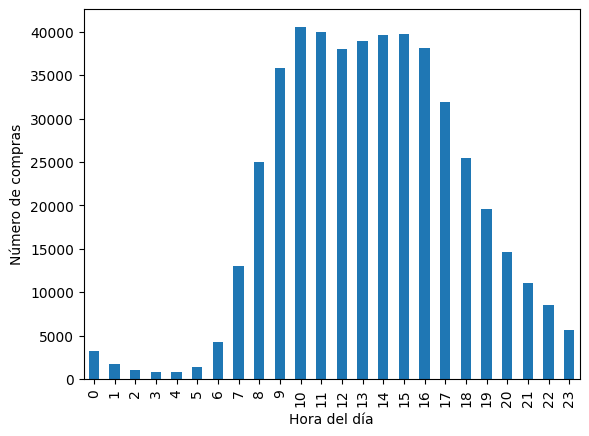

In [36]:
comprashora=df_insta['order_hour_of_day'].value_counts().sort_index()
comprashora.plot(kind='bar',label='Compras por hora',xlabel='Hora del día',ylabel='Número de compras')
plt.show()

Escribe aquí tus conclusiones
Podemos observar que la mayor parte de las compras son entre las 9am y las 4pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

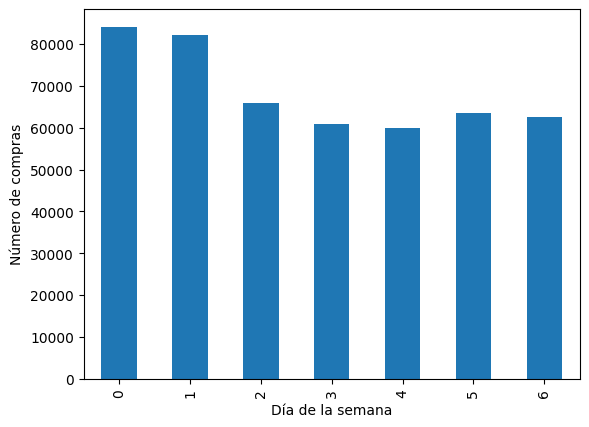

In [37]:
comprassem=df_insta['order_dow'].value_counts().sort_index()
comprassem.plot(kind='bar',label='Compras por día',xlabel='Día de la semana',ylabel='Número de compras')
plt.show()

Escribe aquí tus conclusiones
Observamos que los inicio de semana son los dìa de mayor ventas y el resto de la semana se mantiene en alrededor de 25% menos de ventas que los dias máximos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

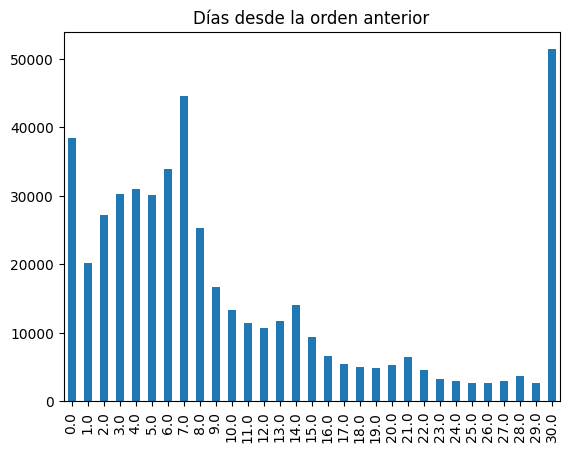

In [38]:
df_insta['days_since_prior_order'].fillna(0,inplace=True)
tiempo_pedido=df_insta['days_since_prior_order'].value_counts().sort_index()
tiempo_pedido.plot(kind='bar',label='Tiempo de espera',title='Días desde la orden anterior')
plt.show()

Escribe aquí tus conclusiones
Podemos ver que la mayoría de clientes tardan entre 0 y 7 días para realizar un nuevo pedido sin embargo despues de 29 días muchos clientes vuelven a pedir algún producto. Vemos que hay clientes que no tardar ni un día en volver a hacer un pedido mientras que hay algunos que tardan 30 días.Importante notar que fue necesario reemplazar los valores NAN por 0 para hacer una correcta valoraciòn de aquellos clientes que tardar el mínimo que es de 0 días.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena esta sección. Los gráficos son muy claros y descriptivos. Muy bien al usar títulos y descripciones de los ejes.
</div>



# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

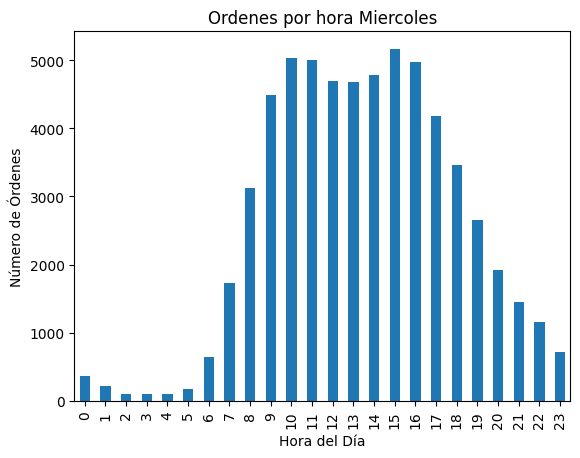

In [39]:
wednesday = df_insta[df_insta['order_dow'] == 3]
hour= wednesday.groupby('order_hour_of_day')['order_number'].count()
hour.plot(kind='bar', title='Ordenes por hora Miercoles',xlabel='Hora del Día', ylabel='Número de Órdenes')
plt.show()

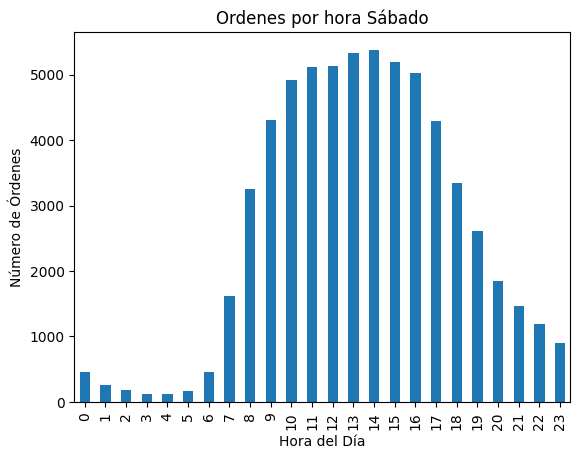

In [40]:
saturday = df_insta[df_insta['order_dow'] == 6]
hour= saturday.groupby('order_hour_of_day')['order_number'].count()
hour.plot(kind='bar', title='Ordenes por hora Sábado',xlabel='Hora del Día', ylabel='Número de Órdenes')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien la comparación de ambos días en general. De nuevo, la visualización es muy clara.
</div>



<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Como sugerencia, recuerda que hay algunos tipos de gráficos que te permiten visualizar los dos días dentro de un solo cuadro.</div>

Escribe aquí tus conclusiones
Podemos observar que los miércoles hay una ligera caida de las ventas al medio dia mientras que para los sábados hay una distribución más similar a una curva de bell.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [41]:
compras_por_cliente = df_insta.groupby('user_id')['order_id'].count()

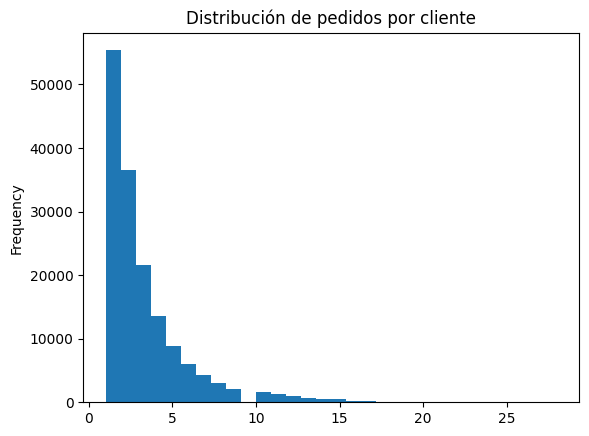

In [42]:
compras_por_cliente.plot(kind='hist', bins=30,title='Distribución de pedidos por cliente',xlabel='Número de pedidos',ylabel='Cantidad de clientes')
plt.show()

Escribe aquí tus conclusiones
Podemos observar que la mayoria de los clientes solo piden de 1 a 3 productos, por lo que se podría buscar estrategias para que los clientes sean recurrentes más que nuevos clientes.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Sería interesante ahondar sobre qué sucedió en el día 9.
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
idmerger= df_order.merge(df_products, on='product_id')

In [44]:
mejores_productos=idmerger.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
veintemejores= mejores_productos.head(20)

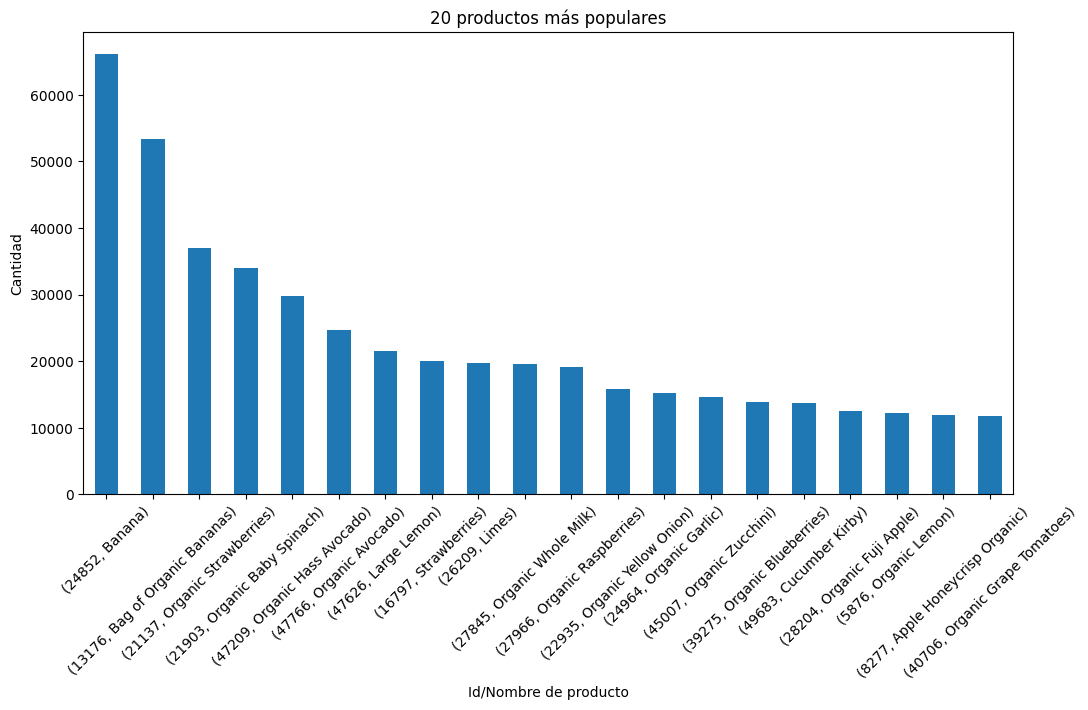

In [45]:
veintemejores.plot(kind='bar',title='20 productos más populares',ylabel='Cantidad',rot=45, xlabel='Id/Nombre de producto',figsize=(12, 6))
plt.show()

La banana es exremadamente propular y vemos que las bananas venden casi en un 50% más que las frutas que le siguen en popularidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo!La lista del TOP 20 es muy completa, has logrado no solo mostrar cuáles son los productos, sino resumir la cantidad de órdenes de cada producto de manera muy clara.
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
distri=df_order.groupby('order_id')['product_id'].count()

<AxesSubplot:ylabel='Frequency'>

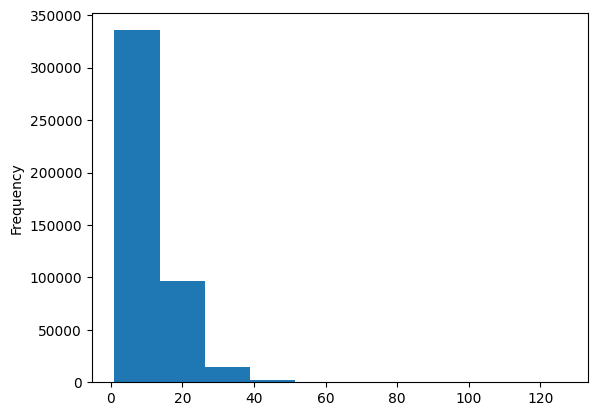

In [47]:
distri.plot(kind='hist')

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Te recomiendo que aumentes la cantidad de bins en el histograma, deberías poder ver la forma de campana de la distribución.
    

</div>

Escribe aquí tus conclusiones
Podemos observar que la gran mayoría de personas compra de 0 a 10 productos, y es raro que se compren más de 20.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
mejores_productos_reordenados=idmerger[idmerger['reordered'] == 1].groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)

In [56]:
mejores_20_productos_reordenados=mejores_productos_reordenados.head(20)

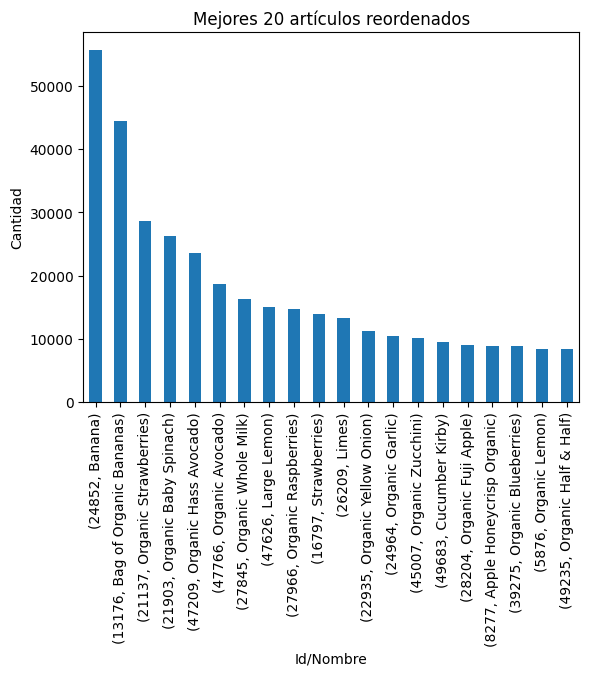

In [59]:
mejores_20_productos_reordenados.plot(kind='bar',title='Mejores 20 artículos reordenados',ylabel='Cantidad',xlabel='Id/Nombre')
plt.show()

Los 20 productos reordenados más pedidos tiene coincidencias con aquellos que se piden con mayor frecuencia. Como es de esperarse hay cierto overlap pero no completo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo! Muy claros y concisos los datos.
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
idmerger.groupby(['product_id','product_name'])['reordered'].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones
Utilizamos la propiedad de la columna booleana de reordered para calcular la relación /proporción de la reordenación de los productos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [67]:
idmerger2= idmerger.merge(df_insta, on='order_id')

In [68]:
idmerger2.groupby(['user_id'])['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones
Utilizamos la propiedad de la columna booleana de reordered para calcular la relación /proporción de la reordenación de los productos pero ahora en función de los usuarios. Importante notar que se requiere la tabla fusionada.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [73]:
primeros_productos = idmerger2[idmerger2['add_to_cart_order'] == 1]

In [74]:
principales = primeros_productos.groupby('product_name')['add_to_cart_order'].count()

In [75]:
principales = principales.sort_values(ascending=False).head(20)

print(principales)

product_name
Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Organic Yellow Onion            1246
Name: add_to_cart_order, dtype: int64


Escribe aquí tus conclusiones

### Conclusion general del proyecto:

In [ ]:
ESTUVO SUPER RETADOR. Varias varias horas incluso siguiendo pasos con la clase pero me queda más claro la relación entre los merge de tablas. :')